In [1]:
import cirq
import Su22 as su
#import qutip as qt
import scipy.signal as si
import scipy.linalg as la
from mezze.tfq import *
import pickle as pk
import random
from matplotlib import pyplot as plt
from tqdm import tqdm
import pickle
import numpy as np
def loadData(inp):
    # for reading also binary mode is important
    dbfile = open(inp, 'rb')     
    db = pickle.load(dbfile)
    dbfile.close()
    return db

In [7]:
# System parameters
N = 190
dt = 20/9*1e-10
T = N*dt
dw = 2*np.pi/T
Nw = int(1e4)
ww = np.linspace(0,np.pi,Nw)
#test = loadData('FGRAFS_controls/FGRAFS-controls_N-128_zero-endpoints-True-wH10.p')
#test= test/np.max(np.abs(test))
#power = np.sum(test**2)*dt
#print(power)

In [8]:
# Useful filter function calculator
def FF(control):
    Theta = np.cumsum(control)*dt
    ff = np.abs(np.fft.rfft( np.cos(Theta), 2*Nw-1)*dt)**2 + np.abs(np.fft.rfft( np.sin(Theta), 2*Nw-1)*dt)**2
    return ff/T**2

In [22]:
pk=10
plt.plot(np.arange(N)[:pk]*np.pi/N, np.array((pulse.norm)*pulse.pi_p*(power/pulse.pi_p))[:pk], color='k')
plt.plot(np.arange(N)[:pk]*np.pi/N, controls[:pk], color='r')
plt.ylabel('$S(\omega)$', fontsize=14)
plt.xlabel('$\omega$', fontsize=14)
plt.show()

In [21]:
pk=2000
plt.plot(ww[:pk], temp[:pk], color='r')
#plt.plot(ww[:pk], FF(pulse.norm*pulse.pi_p*(power/pulse.pi_p))[:pk], color='k')
plt.ylabel('$S(\omega)$', fontsize=14)
plt.xlabel('$\omega$', fontsize=14)
plt.show()

### Controls

In [9]:
# Center frequency of FF
wH = dw
controls = wH*np.ones(N)

# Amplitude shifting to get a π pulse
delta_w = (np.pi - wH*T + (wH*T - np.sum(controls)*dt % (2*np.pi)) )/T
controls *= (delta_w+wH)/wH
# Compute control power
power_2 = np.sum(controls**2)*dt
print(power_2)
print(controls)

233753788.44685337
[74406141.79554775 74406141.79554775 74406141.79554775 74406141.79554775
 74406141.79554775 74406141.79554775 74406141.79554775 74406141.79554775
 74406141.79554775 74406141.79554775 74406141.79554775 74406141.79554775
 74406141.79554775 74406141.79554775 74406141.79554775 74406141.79554775
 74406141.79554775 74406141.79554775 74406141.79554775 74406141.79554775
 74406141.79554775 74406141.79554775 74406141.79554775 74406141.79554775
 74406141.79554775 74406141.79554775 74406141.79554775 74406141.79554775
 74406141.79554775 74406141.79554775 74406141.79554775 74406141.79554775
 74406141.79554775 74406141.79554775 74406141.79554775 74406141.79554775
 74406141.79554775 74406141.79554775 74406141.79554775 74406141.79554775
 74406141.79554775 74406141.79554775 74406141.79554775 74406141.79554775
 74406141.79554775 74406141.79554775 74406141.79554775 74406141.79554775
 74406141.79554775 74406141.79554775 74406141.79554775 74406141.79554775
 74406141.79554775 74406141.7955

[0.0, 0.02, 0.11, 0.17, 0.41, 0.47, 0.62, 0.75, 0.92, 1.0, 1.0, 1.0, 0.91, 0.84, 0.61, 0.49, 0.33, 0.11, 0.08, 0.03, 0.01, 0.02, 0.12, 0.31, 0.43, 0.59, 0.75, 0.78, 0.98, 0.97, 1.0, 0.98, 0.85, 0.65, 0.47, 0.43, 0.31, 0.19, 0.03, 0.0, 0.02, 0.05, 0.18, 0.41, 0.5, 0.76, 0.75, 0.9, 0.99, 1.0, 0.99, 0.95, 0.86, 0.72, 0.49, 0.36, 0.22, 0.11, 0.02, 0.0, 0.04, 0.11, 0.17, 0.36, 0.58, 0.66, 0.82, 0.88, 0.97, 1.0, 0.99, 0.87, 0.73, 0.55, 0.41, 0.34, 0.19, 0.05, 0.01, 0.01, 0.05, 0.18, 0.23, 0.48, 0.62, 0.71, 0.91, 0.96, 1.0, 0.97, 0.92, 0.82, 0.71, 0.61, 0.31, 0.29, 0.11, 0.0, 0.0, 0.01]
[ 0.01    0.0275  0.0375  0.075   0.075   0.0525  0.07    0.075   0.0625
  0.02    0.     -0.0225 -0.04   -0.075  -0.0875 -0.07   -0.095  -0.0625
 -0.02   -0.0175 -0.0025  0.0275  0.0725  0.0775  0.07    0.08    0.0475
  0.0575  0.0475  0.005   0.0025 -0.0375 -0.0825 -0.095  -0.055  -0.04
 -0.06   -0.07   -0.0475 -0.0025  0.0125  0.04    0.09    0.08    0.0875
  0.0625  0.035   0.06    0.025   0.     -0.0125 -

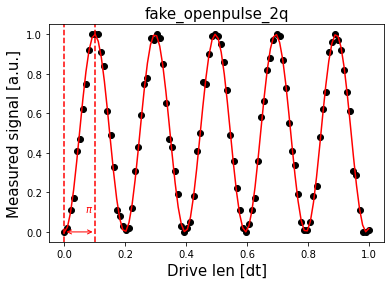

In [6]:
%matplotlib inline
from qiskit.providers.fake_provider import FakeOpenPulse2Q
backend = FakeOpenPulse2Q()
pulse = su.Custom_Fgp('low_freq',np.ones(190),backend)

7.0


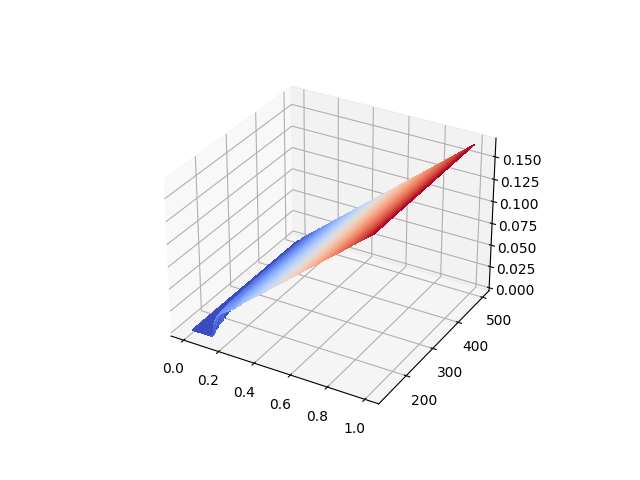

In [4]:
#%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
pi_p = 0.14688280492692987 
power = np.sqrt((346978279.7257978/dt)/128)/pi_p
length = 128
xx = np.linspace(0,1,500-128)
yy= np.linspace(128,500,500-128)
x, y = np.meshgrid(xx, yy)
z= x*y*0+1
print(np.rint(1/pi_p))
for i in range(len(z)):
    for j in range(len(z[i])):
        temp =FF((power)*x[0][j]*np.ones(int(y[i][0])))
        z[i][j]= ww[np.where(temp == np.max(temp))[0][0]]
        #print(int(y[i][0])," , ",(x[0][j])," : ", z[i][j])
surf = ax.plot_surface(x,y,z,cmap=plt.cm.coolwarm,
                       linewidth=0, antialiased=False)
'''[plt.axvline((2*i+1)*pi_p, color='red', linestyle='--') for i in range(1+int(np.rint(1/(2*pulse.pi_p))))]
[plt.axvline((2*i)*pi_p, color='green', linestyle='--') for i in range(1+int(np.rint(1/(2*pulse.pi_p))))]
plt.axhline((power/pi_p), color='black', linestyle='--')
plt.axvline((1), color='black', linestyle='--')
plt.annotate("", xy=(0, 0), xytext=(pulse.pi_p,0), arrowprops=dict(arrowstyle="<->", color='orange'))
plt.annotate("$\pi Pulse$", xy=(pulse.pi_p-0.001, 0.5), color='orange')'''

#plt.grid()
plt.show()

Text(0.5, 0, 'Center Of Filter Function')

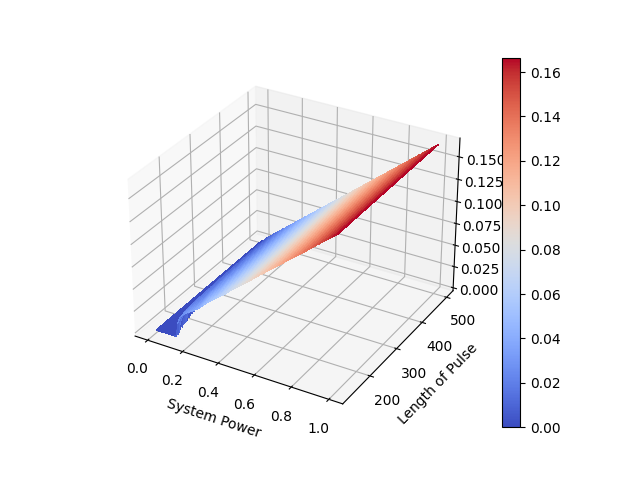

In [6]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf=ax.plot_surface(x[1:],y[1:],z[1:],cmap=plt.cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf)
ax.set_xlabel('System Power')
ax.set_ylabel('Length of Pulse')
ax.set_zlabel('Center Of Filter Function')

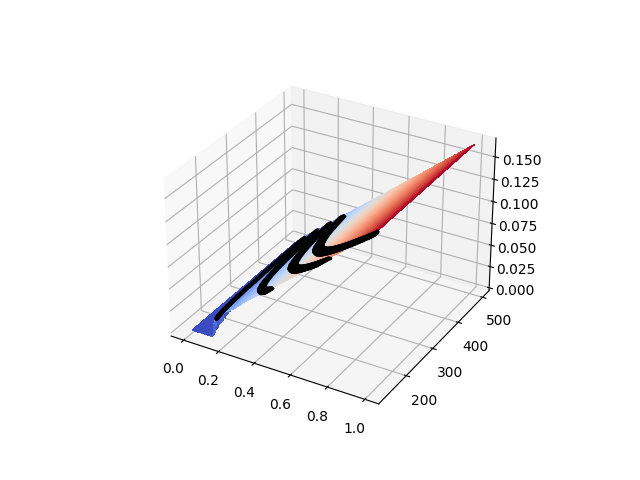

In [9]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
for pp in range(4): 
  zz=(power)*x*y
  zz_l= []
  for i in zz:
      temp_vals= (i/(power*(2*pp+1)*128*pi_p))
      #print(temp_vals)
      arg= (((temp_vals<=1.05) & (temp_vals>=0.95)))
      zz_l.append(np.where(arg)[0])
  xx=[]
  yy=[]
  zz=[]
  for i,j in enumerate(zz_l):
    xx=np.hstack((xx,x[i][j]))
    yy=np.hstack((yy,y[i][j]))
    zz=np.hstack((zz,z[i][j]))
  ax.plot(np.array(xx), np.array(yy), np.array(zz),'k.', markersize=3, label='top', zorder=4)
surf = ax.plot_surface(x,y,z,cmap=plt.cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.show()

In [ ]:
i=np.where(arg)[0]
print(xx[i],", ",yy[i],", ",zz[i])

[] ,  [] ,  []


138384


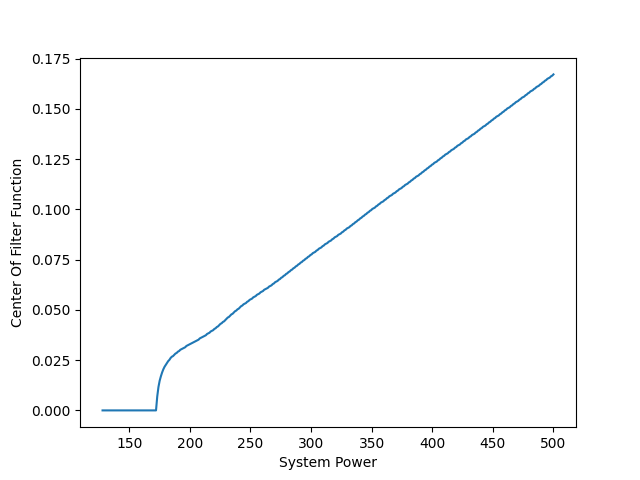

0.9973045822102427 ,  197.18598382749326 ,  0.1665210627465337
1.0 ,  197.18598382749326 ,  0.16714944411538854
0.9919137466307278 ,  198.18867924528303 ,  0.16589268137767885
0.9946091644204852 ,  198.18867924528303 ,  0.16620687206210627
0.9973045822102427 ,  198.18867924528303 ,  0.1665210627465337
1.0 ,  198.18867924528303 ,  0.16714944411538854
0.986522911051213 ,  199.1913746630728 ,  0.16495010932439658
0.9892183288409704 ,  199.1913746630728 ,  0.165264300008824
0.9919137466307278 ,  199.1913746630728 ,  0.16589268137767885
0.9946091644204852 ,  199.1913746630728 ,  0.16620687206210627
0.9973045822102427 ,  199.1913746630728 ,  0.1665210627465337
1.0 ,  199.1913746630728 ,  0.16714944411538854
0.9838274932614556 ,  200.19407008086253 ,  0.16432172795554173
0.986522911051213 ,  200.19407008086253 ,  0.16495010932439658
0.9892183288409704 ,  200.19407008086253 ,  0.165264300008824
0.9919137466307278 ,  200.19407008086253 ,  0.16589268137767885
0.9946091644204852 ,  200.1940700808

In [8]:
#%matplotlib inline
k=2
print((x*y).size)
fig, ax = plt.subplots()
ax.plot(y[:,k],z[k])
ax.set_xlabel('System Power')
ax.set_ylabel('Center Of Filter Function')
plt.show()
for i in range(len(xx)):
  print(xx[i],", ",yy[i],", ",zz[i])

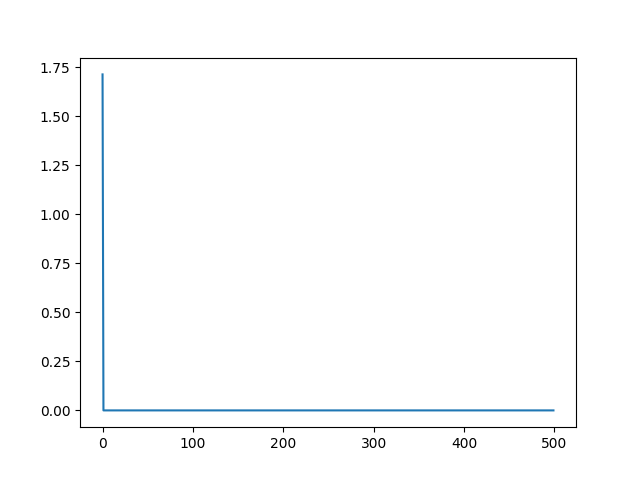

In [ ]:
#%matplotlib inline
pk=2000 
peaks = []
fig, ax2 = plt.subplots()
for i in range(500):
  r = FF((power*(0.03030303)*np.ones(i+1)))
  peaks.append(ww[np.where(r==np.max(r))])
ax2.plot(range(500), peaks)
plt.show()

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

In [ ]:
# Amplitude shifting to get a π pulse
wH=3*dw
test = np.array([pi_p for i in range(128)])
for _ in range(1000000):
    delta_w = (np.pi - wH*T + (wH*T - np.sum(test)*dt % (2*np.pi)) )/T
    test *= (delta_w+wH)/wH

# Compute control power
power = np.sum(test**2)*dt
print(power)
print(test[0])

346978279.7257978
110446616.72776616


In [ ]:
zero_state = [1,0]  
one_state = [0,1]

U_n = qt.identity(2).full()
for n,Omega_n in enumerate(controls):
    H_n = qt.sigmax().full()*Omega_n/2
    U_n = la.expm(-1j*dt*H_n) @ U_n
    final_state = U_n@zero_state
    gate_fidelity = np.abs(final_state.transpose().conj() @ one_state)**2
    #print(gate_fidelity)
print(U_n)
final_state = U_n@zero_state

gate_fidelity = np.abs(final_state.transpose().conj() @ one_state)**2
print("Ideal gate fidelity: %.8f"%gate_fidelity)

## Bandpass noise

In [ ]:
# Compute arma coefficients for narrow band noise with center wc 
def arma_coefficients(wc):
    b = si.firwin(128, .001)
    b *= np.cos(wc*np.arange(len(b)))
    b = b/np.linalg.norm(b)*.1
    return b

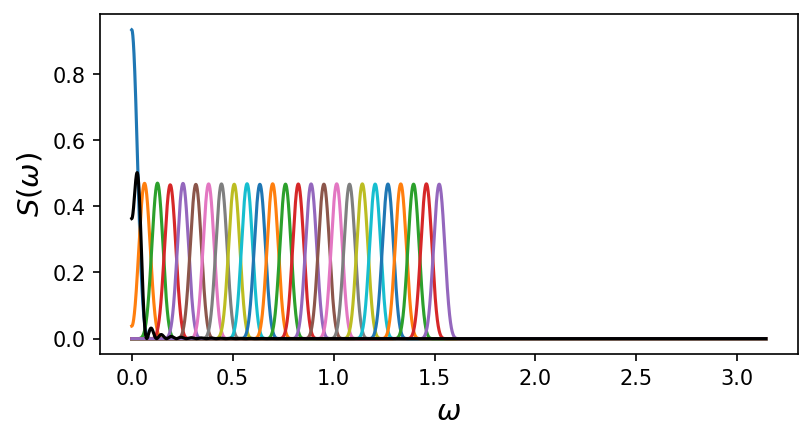

In [ ]:
# center frequencies of injected PSD
center_freqs = np.linspace(0, .5*np.pi, 100)

plt.figure(figsize=(6,3), dpi=150)

for wc in center_freqs[::4]:
    b = arma_coefficients(wc)
    S = SimpleDephasingSchWARMAFier(b, [1,])
    plt.plot(*S.psd(worN=Nw))
    
plt.plot(ww, FF(test), color='k')
plt.ylabel('$S(\omega)$', fontsize=14)
plt.xlabel('$\omega$', fontsize=14)
plt.show()

### Noise trajectories

In [ ]:
# Generate dummy circuit to get noise trajectories from schwarma
dummy_circ = cirq.Circuit([cirq.I(cirq.GridQubit(1,1))]*N)

In [ ]:
# Generate sample trajectories
b = arma_coefficients(center_freqs[0])
S = SimpleDephasingSchWARMAFier(b, [1,])
noise_trajectories = S.gen_noise_instances(dummy_circ,100) # 1000 different trajectories

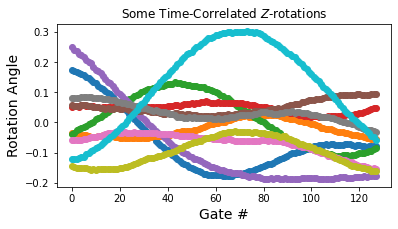

In [ ]:
plt.figure(figsize=(6,3))
plt.plot(noise_trajectories[:10].T,'-o')
plt.ylabel('Rotation Angle', size=14)
plt.xlabel(r'Gate #', size=14)
plt.title(r'Some Time-Correlated $Z$-rotations')
plt.show()

## Simulations scanning over different center frequencies

In [ ]:
fidelity_wc = {}

# Scan over frequencies by varying noise center frequency
num_trajs = 10 # recommend: 10 for quick test, 100 for better resolution
for wc in tqdm(center_freqs):
    b = arma_coefficients(wc)
    S = SimpleDephasingSchWARMAFier(b, [1,])
    noise_trajectories = S.gen_noise_instances(dummy_circ, num_trajs)
    
    noisy_fidelities = []
    # Average over noise trajectories
    for beta in noise_trajectories:
        beta *= np.sqrt(0.01/np.sum(beta**2)) # Rescale for reasonable power

        U_n = qt.identity(2).full()
        for n,Omega_n in enumerate(test):
            H_n = qt.sigmax().full()*Omega_n/2 
            U_n = la.expm(-1j*qt.sigmaz().full()*beta[n]) @ la.expm(-1j*dt*H_n) @ U_n
        final_state = U_n@zero_state
        
        noisy_fidelities += [np.abs(final_state.transpose().conj() @ one_state)**2]
        
    fidelity_wc[wc] = np.mean(noisy_fidelities)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:35<00:00,  1.04it/s]


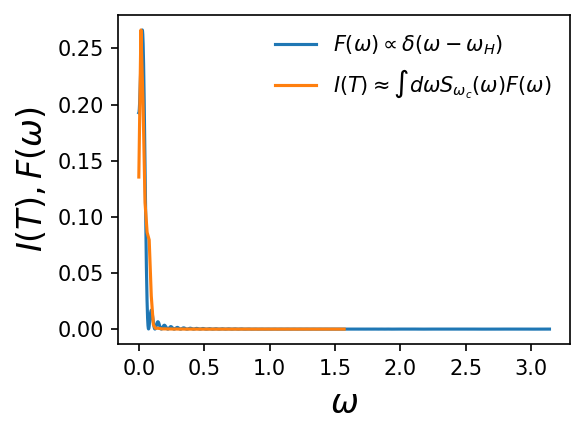

In [ ]:
plt.figure(dpi=150, figsize=(4,3))

infidelity = 1-np.array(list(fidelity_wc.values()))
filter_function = FF(test)

plt.plot(ww, filter_function*np.max(infidelity)/np.max(filter_function), 
         label=r'$F(\omega)\propto \delta(\omega-\omega_H)$')
plt.plot(center_freqs, infidelity, 
         label=r'$I(T)\approx \int d\omega S_{\omega_c}(\omega) F(\omega)$')
plt.ylabel('$I(T), F(\omega)$',size=16)
plt.xlabel('$\omega$',size=16)
plt.legend(frameon=False)

plt.tight_layout()
plt.show()